# Housing Assignment: A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house and how well those variables describe the price of a house.
Determine the optimal value of lambda for ridge and lasso regression.

In [230]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [231]:
#Reading the dataset and displaying the first 5 rows
hsg = pd.read_csv('train.csv')
hsg.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [232]:
# No. of rows and columns in the dataset
print(hsg.shape)

# Info about the dataset
print(hsg.info())

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st     

In [233]:
# Dataset summary
print(hsg.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [234]:
# Find the percentage of missing values.
df = ((100*hsg.isnull().sum()/len(hsg.index)).sort_values(ascending = False).to_frame())

# Display only those columns having nulls
df[df.iloc[:,0]> 0.00]

,0
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageCond,5.547945
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945


In [235]:
# Find the unique values in each non-numeric columns
# We see that the columns 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu' have more than 50% missing values. 
# Explore the unique values in each of the non numeric columns
col_list = list(hsg.select_dtypes(include=['object']).columns)[1:]
for i in col_list :
    print( i , hsg[i].unique())
    print("\n")
    


Street ['Pave' 'Grvl']


Alley [nan 'Grvl' 'Pave']


LotShape ['Reg' 'IR1' 'IR2' 'IR3']


LandContour ['Lvl' 'Bnk' 'Low' 'HLS']


Utilities ['AllPub' 'NoSeWa']


LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


LandSlope ['Gtl' 'Mod' 'Sev']


Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']


Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']


BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']


HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']


RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']


RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']


Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'H

In [236]:
# As mentioned in the data dictionary, for few columns a value of NA doesn't necessarily indicate missing values but the
# feature not present for the property.
# For the column PoolQC, a value of NA indicates that the property doesn't contain any pool.
# For the column MiscFeature, a value of NA indicates that the property doesn't contain any miscellaneous feature.
# For the column Alley, a value of NA indicates that the property doesn't contain any alley access.
# For the column Fence, a value of NA indicates that the property doesn't contain any fence.
# For the column FireplaceQU, a value of NA indicates that the property doesn't contain any fireplace.
# For the columns BsmtQual, BsmtCond, BsmtExposure, BsmtFinType2, BsmtFinType1 a value of NA indicates that 
# the property doesn't contain any basement.
# For the columns GarageQual, GarageFinish, GarageCond, GarageType a value of NA indicates that 
# the property doesn't contain any garage.

# Lets replace the null values to something more meaningful as indicated by the data dictionary

hsg['PoolQC'].fillna("No Pool",inplace=True)
hsg['MiscFeature'].fillna("No Misc Ftr",inplace=True)
hsg['Alley'].fillna("No Alley",inplace=True)
hsg['Fence'].fillna("No Fence",inplace=True)
hsg['FireplaceQu'].fillna("No Fireplace",inplace=True)
hsg['BsmtQual'].fillna("No Basement",inplace=True)
hsg['BsmtCond'].fillna("No Basement",inplace=True)
hsg['BsmtExposure'].fillna("No Basement",inplace=True)
hsg['BsmtFinType2'].fillna("No Basement",inplace=True)
hsg['BsmtFinType1'].fillna("No Basement",inplace=True)
hsg['GarageQual'].fillna("No Garage",inplace=True)
hsg['GarageFinish'].fillna("No Garage",inplace=True)
hsg['GarageCond'].fillna("No Garage",inplace=True)
hsg['GarageType'].fillna("No Garage",inplace=True)


print(hsg['PoolQC'].unique())
print(hsg['MiscFeature'].unique())
print(hsg['Alley'].unique())
print(hsg['Fence'].unique())
print(hsg['FireplaceQu'].unique())
print(hsg['BsmtQual'].unique())
print(hsg['BsmtCond'].unique())
print(hsg['BsmtExposure'].unique())
print(hsg['BsmtFinType2'].unique())
print(hsg['BsmtFinType1'].unique())
print(hsg['GarageQual'].unique())
print(hsg['GarageFinish'].unique())
print(hsg['GarageCond'].unique())
print(hsg['GarageType'].unique())

['No Pool' 'Ex' 'Fa' 'Gd']
['No Misc Ftr' 'Shed' 'Gar2' 'Othr' 'TenC']
['No Alley' 'Grvl' 'Pave']
['No Fence' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
['No Fireplace' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
['Gd' 'TA' 'Ex' 'No Basement' 'Fa']
['TA' 'Gd' 'No Basement' 'Fa' 'Po']
['No' 'Gd' 'Mn' 'Av' 'No Basement']
['Unf' 'BLQ' 'No Basement' 'ALQ' 'Rec' 'LwQ' 'GLQ']
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'No Basement' 'LwQ']
['TA' 'Fa' 'Gd' 'No Garage' 'Ex' 'Po']
['RFn' 'Unf' 'Fin' 'No Garage']
['TA' 'Fa' 'No Garage' 'Gd' 'Po' 'Ex']
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'No Garage' 'Basment' '2Types']


In [237]:
# For the columns GarageYrBlt, lets replace the null values with the values present in the column 'YearBuilt'.
# The column 'YearBuilt' indicates when the construction was built. We assume that the garage was constructed in the same
# year as the construction was built.

hsg.loc[hsg['GarageYrBlt'].isnull(),'GarageYrBlt'] = hsg['YearBuilt']


# Drop the null rows corresponding to the null values in the columns MasVnrType and Electrical
hsg.dropna(subset=['MasVnrType','Electrical'],inplace=True)


# Replace the null values in the column 'LotFrontage' with the mode value
hsg['LotFrontage'].fillna(hsg['LotFrontage'].mode()[0], inplace=True)

In [238]:
# Find the percentage of missing values.
df = ((100*hsg.isnull().sum()/len(hsg.index)).sort_values(ascending = False).to_frame())

# Display only those columns having nulls
print(df[df.iloc[:,0]> 0.00])

print("\n")
print("Rows and Columns in the dataset")
print(hsg.shape)

Empty DataFrame
Columns: [0]
Index: []


Rows and Columns in the dataset
(1451, 81)


There are no nulls in the dataset. 
No. of rows reduced from 1460 to 1451 whereas the number of columns has remained the same.

In [239]:
# Lets drop the column ID as this is not very relevant for our analysis. 
hsg.drop(['Id'],axis=1,inplace=True)

In [240]:
# Get the percentage occurance of each value in every categorical column

objcols = list(hsg.select_dtypes(include=['object']).columns)[1:]
for i in objcols:
    print( i , hsg[i].value_counts(normalize=True)*100)
    print("\n")
    
    


Street Pave    99.586492
Grvl     0.413508
Name: Street, dtype: float64


Alley No Alley    93.797381
Grvl         3.445899
Pave         2.756720
Name: Alley, dtype: float64


LotShape Reg    63.266713
IR1    33.218470
IR2     2.825637
IR3     0.689180
Name: LotShape, dtype: float64


LandContour Lvl    89.731220
Bnk     4.341833
HLS     3.445899
Low     2.481048
Name: LandContour, dtype: float64


Utilities AllPub    99.931082
NoSeWa     0.068918
Name: Utilities, dtype: float64


LotConfig Inside     72.019297
Corner     18.056513
CulDSac     6.409373
FR2         3.239145
FR3         0.275672
Name: LotConfig, dtype: float64


LandSlope Gtl    94.624397
Mod     4.479669
Sev     0.895934
Name: LandSlope, dtype: float64


Neighborhood NAmes      15.506547
CollgCr    10.268780
OldTown     7.787733
Edwards     6.891799
Somerst     5.720193
Gilbert     5.375603
NridgHt     5.237767
Sawyer      5.099931
NWAmes      5.031013
BrkSide     3.997243
SawyerW     3.997243
Crawfor     3.445899
Mitch

In [241]:
# Dropping the columns where >= 98% of the value is occupied by a single value. The columns would be Street, Utilities, 
# Condition2, RoofMatl, PoolQC 

hsg.drop(['Street', 'Utilities', 'Condition2', 'RoofMatl', 'PoolQC' ],axis=1,inplace=True)

In [242]:
#Outlier Treatment
numerics = ['int32','int64','float32','float64']
numcols = list(hsg.select_dtypes(include = numerics).columns)
numcols.remove('SalePrice')
print(len(numcols))
# print(type(numcols))



36


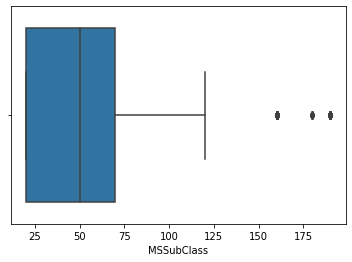

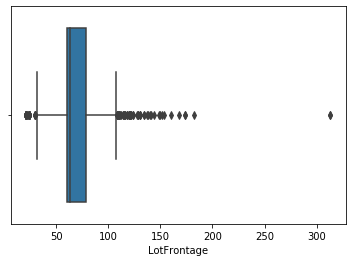

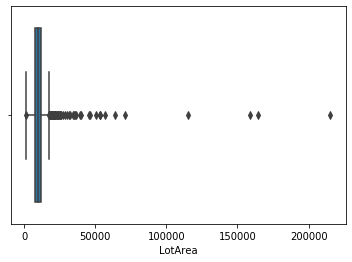

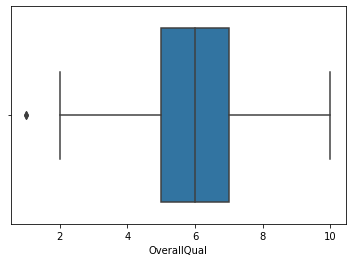

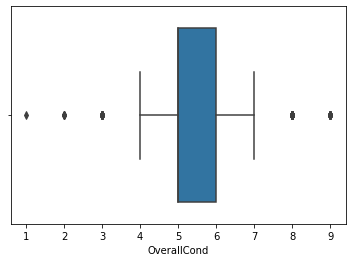

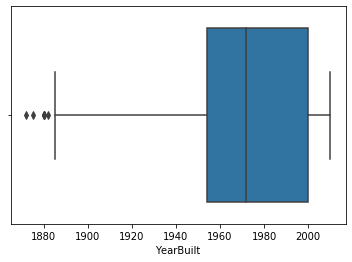

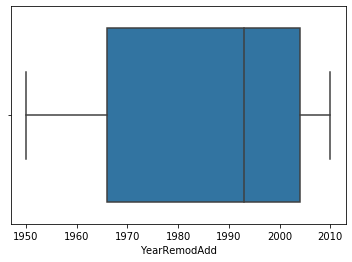

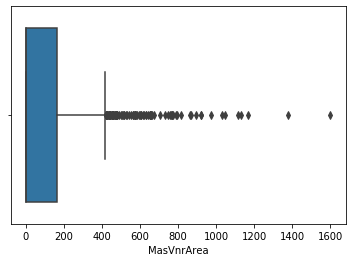

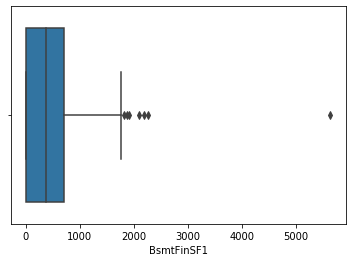

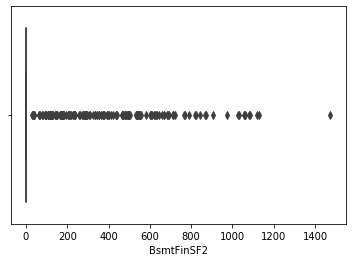

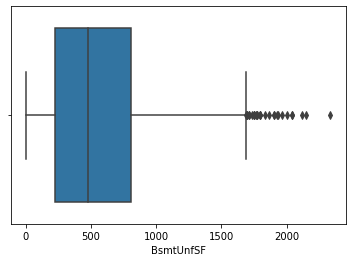

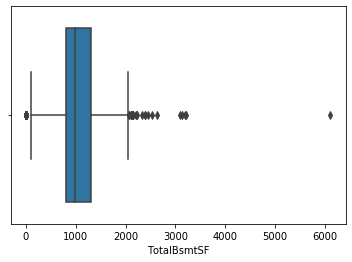

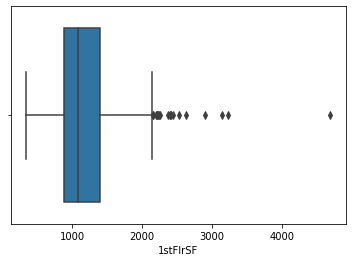

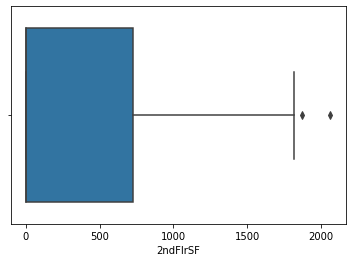

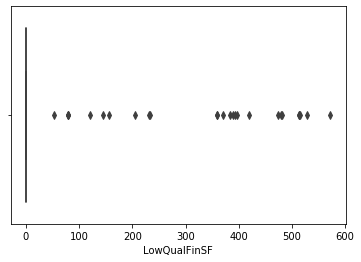

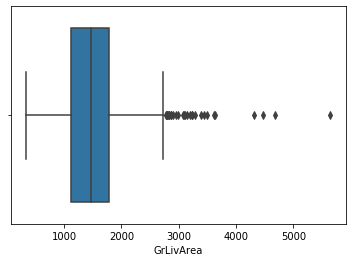

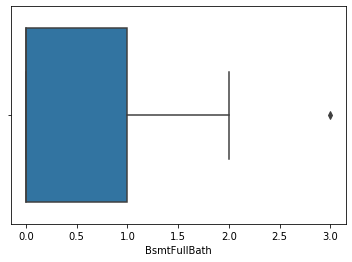

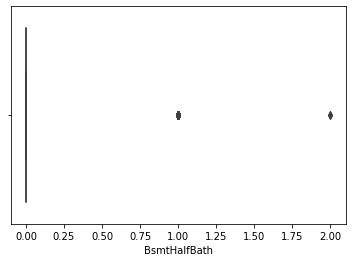

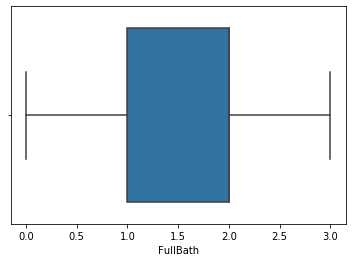

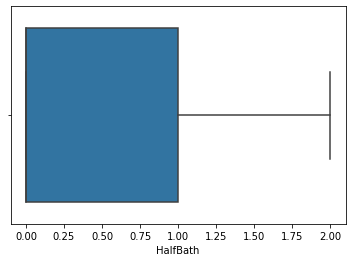

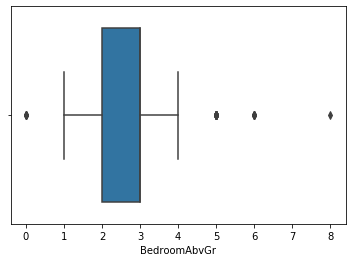

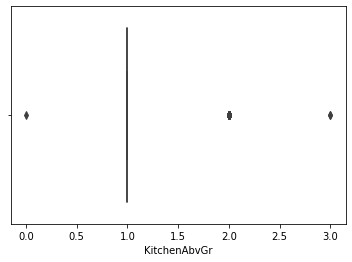

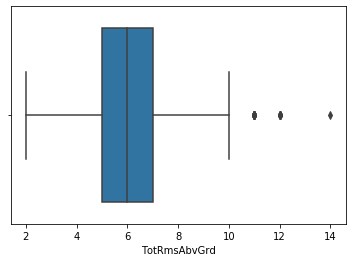

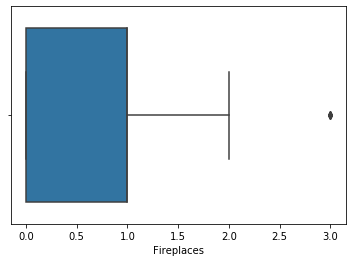

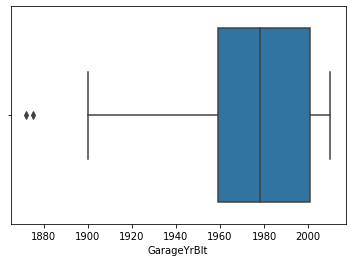

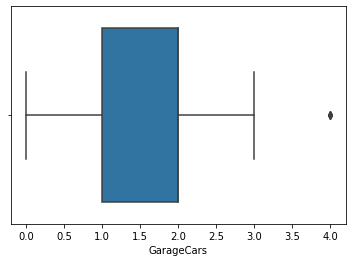

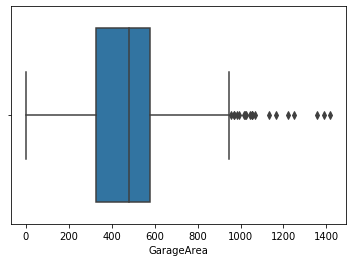

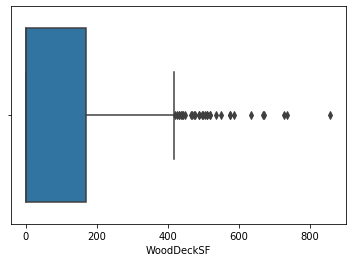

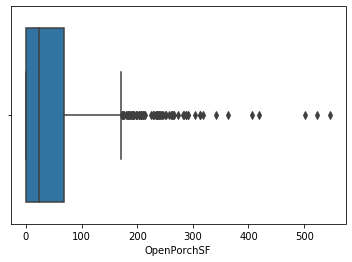

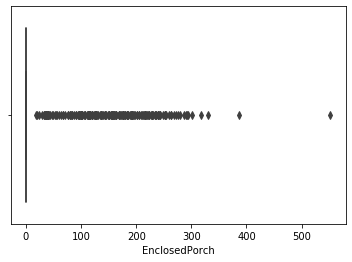

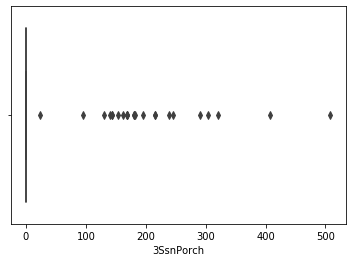

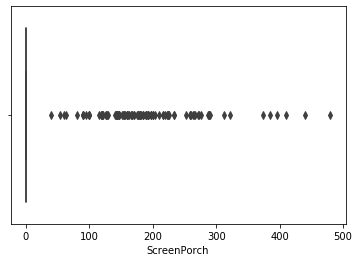

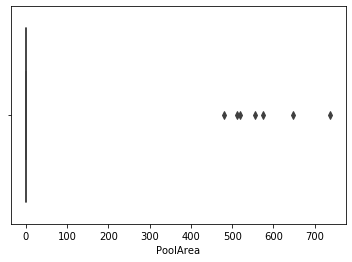

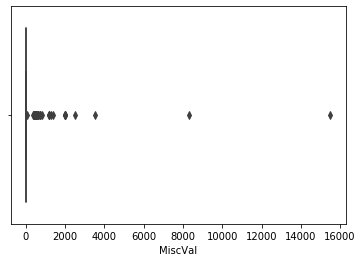

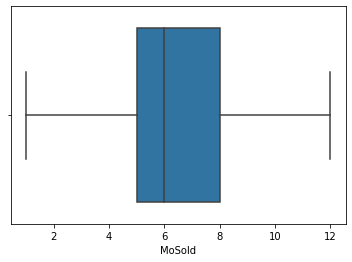

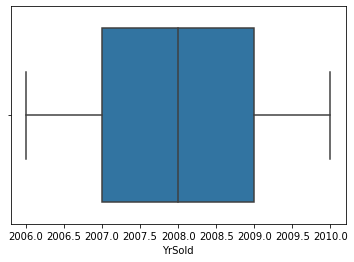

In [243]:
for i in range(len(numcols)):
#     print(numcols[i])
    sns.boxplot(hsg[numcols[i]])
    plt.show()

In [244]:

# num_col = ['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt', 'MasVnrArea','BsmtFinSF1',
#            'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','1stFlrSF', '2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath',
#            'BsmtHalfBath', 'BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces' ,'GarageYrBlt','GarageCars',
#            'GarageArea',  'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch','3SsnPorch', 'ScreenPorch' ,'PoolArea','MiscVal']

#Dropping the outliers where the concentration of outliers is very large
num_col = ['LotFrontage','LotArea', 'MasVnrArea','BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF',
          'LowQualFinSF','GrLivArea', 
           'GarageArea',  'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch','3SsnPorch', 'ScreenPorch' ,'PoolArea','MiscVal']
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

hsg = drop_outliers(hsg)

In [245]:
hsg.shape

(1431, 75)

In [246]:
# for i in range(len(numcols)):
# #     print(numcols[i])
#     sns.boxplot(hsg[numcols[i]])
#     plt.show()

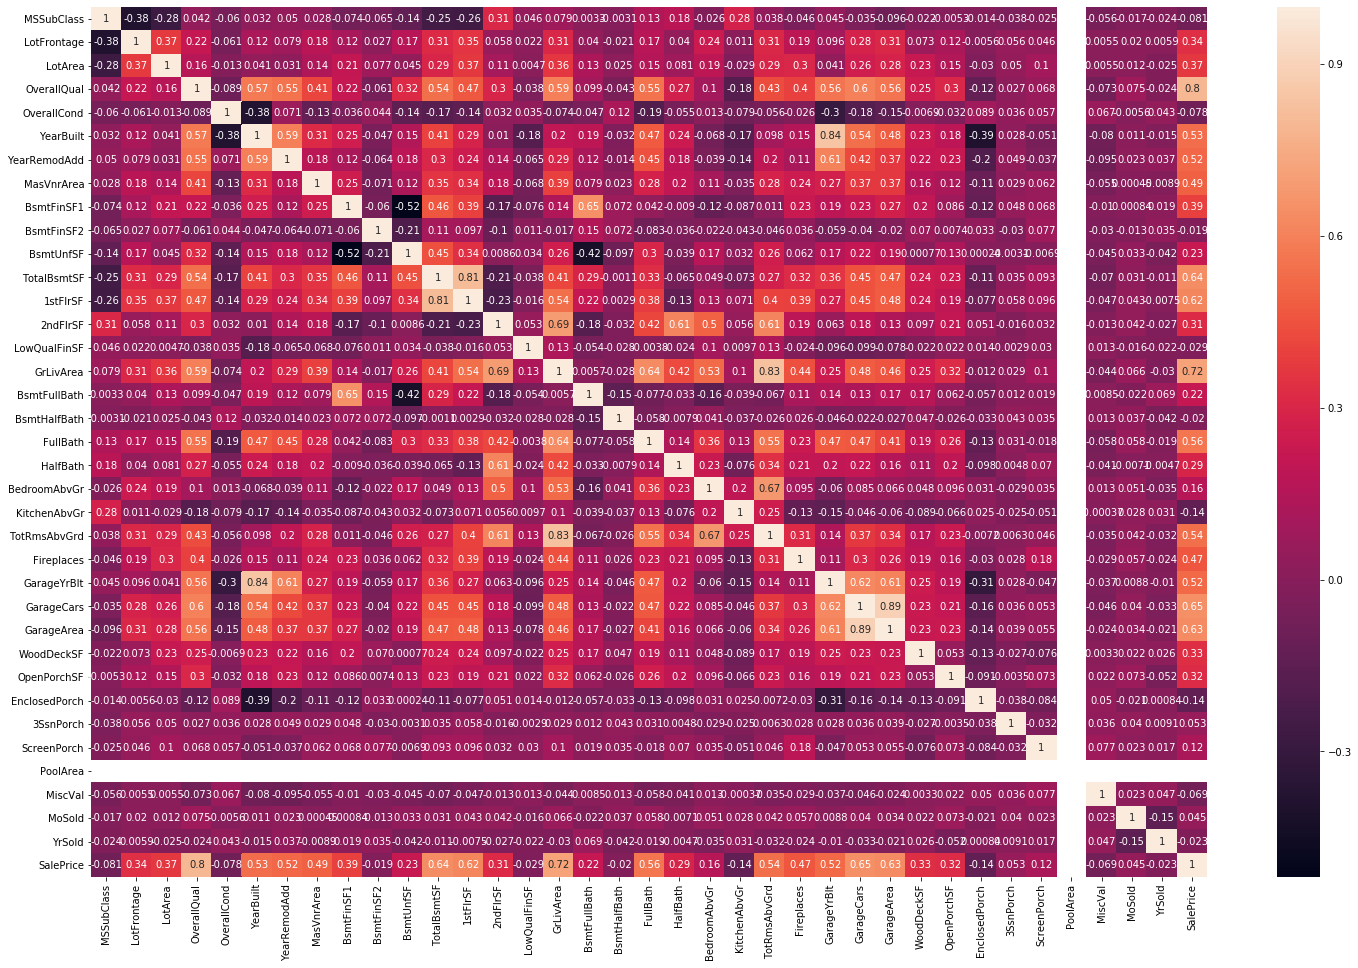

In [247]:
plt.figure(figsize=(25,16))
sns.heatmap(hsg[list(hsg.dtypes[hsg.dtypes!='object'].index)].corr(),annot=True)
plt.show()

In [248]:
hsg.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.384513,-0.281145,0.041952,-0.060374,0.032231,0.050139,0.027749,-0.073531,-0.065181,...,-0.021588,-0.005301,-0.014477,-0.037878,-0.025395,NaN,-0.056178,-0.017377,-0.023920,-0.081420
LotFrontage,-0.384513,1.000000,0.374060,0.219442,-0.060513,0.116516,0.079221,0.177544,0.115697,0.026818,...,0.073097,0.122676,-0.005636,0.055510,0.045973,NaN,0.005523,0.020329,0.005913,0.340261
LotArea,-0.281145,0.374060,1.000000,0.163370,-0.013063,0.041079,0.030845,0.140778,0.208045,0.077317,...,0.228121,0.151065,-0.030454,0.050448,0.099992,NaN,0.005456,0.011558,-0.024821,0.369953
OverallQual,0.041952,0.219442,0.163370,1.000000,-0.088752,0.574601,0.551850,0.410543,0.216876,-0.060908,...,0.248246,0.300451,-0.123328,0.026798,0.067905,NaN,-0.073172,0.075182,-0.024133,0.797034
OverallCond,-0.060374,-0.060513,-0.013063,-0.088752,1.000000,-0.377646,0.071321,-0.127383,-0.035689,0.044142,...,-0.006886,-0.032337,0.089305,0.035981,0.057187,NaN,0.067183,-0.005612,0.042667,-0.078131
YearBuilt,0.032231,0.116516,0.041079,0.574601,-0.377646,1.000000,0.594479,0.314874,0.253822,-0.047033,...,0.229526,0.184036,-0.389400,0.027524,-0.050739,NaN,-0.079988,0.010696,-0.014832,0.534286
YearRemodAdd,0.050139,0.079221,0.030845,0.551850,0.071321,0.594479,1.000000,0.176471,0.124715,-0.063700,...,0.215515,0.225975,-0.198705,0.048781,-0.037452,NaN,-0.095381,0.022927,0.036689,0.518269
MasVnrArea,0.027749,0.177544,0.140778,0.410543,-0.127383,0.314874,0.176471,1.000000,0.247520,-0.071062,...,0.162152,0.116631,-0.109567,0.029123,0.061781,NaN,-0.055258,0.000452,-0.008948,0.494516
BsmtFinSF1,-0.073531,0.115697,0.208045,0.216876,-0.035689,0.253822,0.124715,0.247520,1.000000,-0.060467,...,0.204778,0.086166,-0.118942,0.047717,0.067513,NaN,-0.009972,0.000836,0.019101,0.390850
BsmtFinSF2,-0.065181,0.026818,0.077317,-0.060908,0.044142,-0.047033,-0.063700,-0.071062,-0.060467,1.000000,...,0.069710,0.007414,0.033318,-0.029635,0.076990,NaN,-0.029542,-0.012635,0.035052,-0.019227


In [249]:
# Dropping the columns PoolArea, GarageYrBlt, GarageCars
# PoolArea has unique value post outlier removal
# GarageYrBlt is highly correlated to the column YearBuilt, GarageCars is highly correlated to the col GarageArea

hsg.drop('PoolArea',axis=1,inplace=True)
hsg.drop('GarageYrBlt',axis=1,inplace=True)
hsg.drop('GarageCars',axis=1,inplace=True)

In [250]:
# get dummies
objcols = list(hsg.select_dtypes(include=['object']).columns)[:]
for i in range(len(objcols)):
    newcols = pd.get_dummies(hsg[objcols[i]],prefix=objcols[i],drop_first=True)
    hsg = pd.concat([hsg,newcols],axis=1)

hsg.drop(objcols,axis=1,inplace=True)

print(hsg.shape)



(1431, 236)


In [251]:
hsg.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


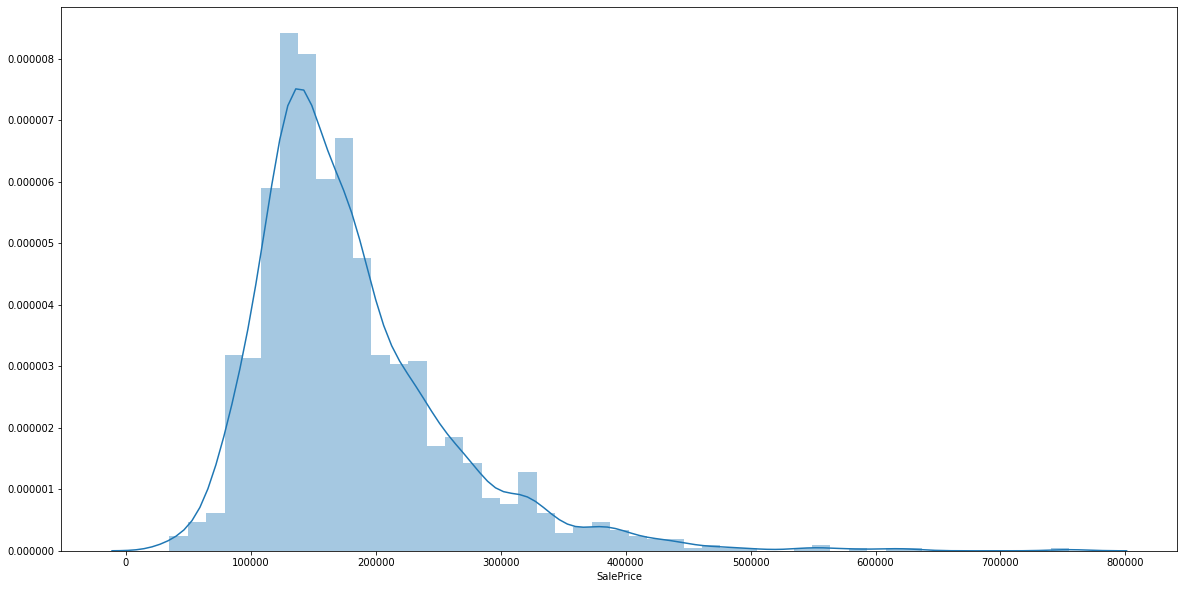

In [252]:
# Distribution of the SalePrice (Target Variable)
plt.figure(figsize = (20,10))
sns.distplot(hsg["SalePrice"])

The target variable is normally distributed

In [253]:
# Split the data set
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(hsg,train_size=0.7,test_size=0.3,random_state=42)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

hsg.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [254]:
numcols = list(hsg.select_dtypes(include = numerics).columns)

print(numcols)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [255]:
df_train[numcols] = scaler.fit_transform(df_train[numcols])
df_test[numcols] = scaler.transform(df_test[numcols])

In [256]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
822,0.077737,-0.391379,0.406179,0.639346,-0.512641,1.042203,0.861603,-0.594085,-1.024738,-0.284169,...,0,0,0,0,1,0,0,1,0,0
1254,0.077737,-0.391379,-0.562105,0.639346,-0.512641,1.042203,0.910181,-0.084567,-1.024738,-0.284169,...,0,0,0,0,1,0,0,0,1,0
595,-0.862621,0.063228,0.212629,1.349651,-0.512641,1.107740,1.007338,0.724015,2.256087,-0.284169,...,0,0,1,0,0,0,0,0,0,1
1028,-0.157353,0.568348,-0.108183,-0.781265,-0.512641,-0.989433,-1.713062,-0.594085,-0.175692,-0.026586,...,0,0,0,0,1,0,0,0,1,0
1388,-0.862621,-1.300595,0.848935,2.059957,-0.512641,1.140508,1.055917,0.292033,2.020753,-0.284169,...,0,0,0,0,1,0,0,0,1,0


In [257]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1.001000e+03,1.001000e+03,1.001000e+03,1.001000e+03,1.001000e+03,1.001000e+03,1.001000e+03,1.001000e+03,1.001000e+03,1.001000e+03,...,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,-2.340230e-17,2.118408e-16,1.573833e-16,6.721230e-17,2.199373e-16,-5.736337e-16,-1.417448e-15,-2.198264e-16,-1.153478e-17,1.356446e-16,...,0.002997,0.002997,0.079920,0.000999,0.874126,0.001998,0.005994,0.013986,0.832168,0.081918
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,...,0.054690,0.054690,0.271305,0.031607,0.331873,0.044677,0.077227,0.117491,0.373904,0.274377
min,-8.626212e-01,-2.361346e+00,-1.528794e+00,-3.622487e+00,-4.039467e+00,-3.250448e+00,-1.713062e+00,-5.940848e-01,-1.024738e+00,-2.841693e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.626212e-01,-3.913794e-01,-4.506182e-01,-7.812650e-01,-5.126406e-01,-5.634451e-01,-8.872264e-01,-5.940848e-01,-1.024738e+00,-2.841693e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-1.573526e-01,-2.398435e-01,-9.807986e-02,-7.095958e-02,-5.126406e-01,2.638489e-02,4.243953e-01,-5.940848e-01,-1.318556e-01,-2.841693e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.128264e-01,6.188599e-01,2.626117e-01,6.393458e-01,3.690660e-01,9.766665e-01,9.101811e-01,3.363384e-01,6.272101e-01,-2.841693e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.133901e+00,5.771081e+00,1.075138e+01,2.770262e+00,3.014186e+00,1.238813e+00,1.201653e+00,8.267088e+00,4.189512e+00,8.976260e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [258]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [259]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [260]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

lm  = LinearRegression()
lm.fit(X_train,y_train)

# Use RFE and start with 200 features
rfe = RFE(lm,200)
rfe.fit(X_train,y_train)




RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=200, step=1, verbose=0)

In [261]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [262]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)
list(rfe_sel_columns)

['LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MoSold',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Alley_No Alley',
 'Alley_Pave',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighbor

In [263]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

# Lasso Regression

Start with alpha = 0.001

In [264]:

lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print('Training R2 score: ',r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print('Test R2 score: ',r2_score(y_true=y_test,y_pred=y_test_pred))

Training R2 score:  0.9156596653857835
Test R2 score:  0.8818078204935162


In [265]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', 0.162),
 ('LotFrontage', 0.071),
 ('LotArea', 0.153),
 ('OverallQual', 0.085),
 ('OverallCond', 0.11),
 ('YearBuilt', 0.017),
 ('YearRemodAdd', 0.031),
 ('MasVnrArea', 0.091),
 ('BsmtFinSF1', 0.009),
 ('BsmtFinSF2', -0.0),
 ('BsmtUnfSF', 0.096),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.053),
 ('2ndFlrSF', -0.011),
 ('LowQualFinSF', 0.24),
 ('GrLivArea', 0.019),
 ('BsmtFullBath', 0.028),
 ('BsmtHalfBath', -0.028),
 ('FullBath', -0.058),
 ('HalfBath', 0.065),
 ('BedroomAbvGr', 0.068),
 ('KitchenAbvGr', 0.085),
 ('TotRmsAbvGrd', 0.032),
 ('Fireplaces', 0.017),
 ('GarageArea', 0.016),
 ('WoodDeckSF', 0.04),
 ('OpenPorchSF', -0.024),
 ('EnclosedPorch', 0.041),
 ('3SsnPorch', -0.0),
 ('ScreenPorch', 0.0),
 ('MiscVal', -0.0),
 ('MoSold', -0.0),
 ('YrSold', -0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.005),
 ('MSZoning_RL', 0.169),
 ('MSZoning_RM', -0.033),
 ('Alley_No Alley', 0.163),
 ('Alley_Pave', 0.104),
 ('LotShape_IR2', -0.052),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg'

In [266]:
# GridSearchCV: Using GridSearch CV to find the optimal value for alpha

folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0,50.0,100.0,500.0,1000.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    2.7s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0, 50.0,
                                   100.0, 500.0, 1000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [267]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.088286,0.015686,0.002568,0.001496,0.001,{'alpha': 0.001},0.634641,0.861941,0.880084,0.890235,...,0.917096,0.916909,0.917408,0.913942,0.916089,0.916419,0.913743,0.912945,0.918037,0.006135
1,0.020628,0.007824,0.002981,0.001905,0.010,{'alpha': 0.01},0.611556,0.846461,0.885384,0.854909,...,0.874028,0.872650,0.873103,0.870244,0.869786,0.871466,0.870990,0.867635,0.874783,0.009261
2,0.011805,0.001462,0.001932,0.001541,0.100,{'alpha': 0.1},0.650742,0.769207,0.832681,0.785459,...,0.803740,0.803319,0.803203,0.799202,0.803600,0.808817,0.801983,0.800024,0.806064,0.008037
3,0.008825,0.001946,0.002727,0.002050,1.000,{'alpha': 1.0},-0.000008,-0.024659,-0.001368,-0.000186,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.012252,0.002498,0.002362,0.001888,5.000,{'alpha': 5.0},-0.000008,-0.024659,-0.001368,-0.000186,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


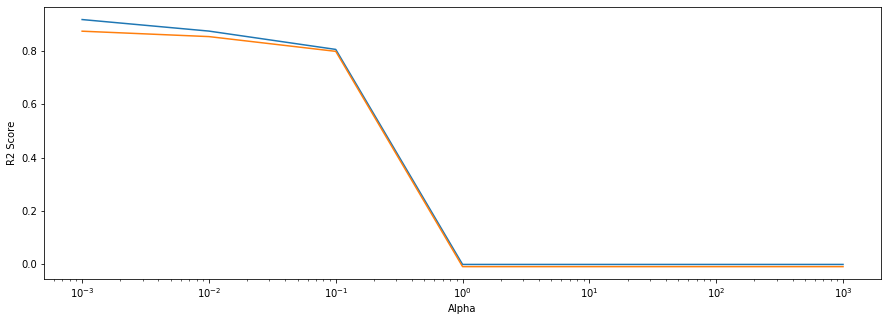

In [268]:
plt.figure(figsize=(15,5))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [269]:
model_cv.best_params_

{'alpha': 0.001}

In [270]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('Training R2 score: ', r2_score(y_true=y_train,y_pred=y_train_pred))
print('Test R2 score: ',r2_score(y_true=y_test,y_pred=y_test_pred))

model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']
print(lasso_coef[lasso_coef.iloc[:,1]!= 0.00].sort_values(by='Coef',ascending=False).count())
print("\n")

#The top 10 predictor variables
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Training R2 score:  0.9156596653857835
Test R2 score:  0.8818078204935162
Feature    109
Coef       109
dtype: int64




,Feature,Coef
56,Neighborhood_Crawfor,0.385626
63,Neighborhood_NPkVill,0.375102
57,Neighborhood_Edwards,0.353254
14,LowQualFinSF,0.239552
90,HouseStyle_2.5Unf,0.231787
48,LotConfig_Inside,0.222701
194,FireplaceQu_TA,0.220796
131,ExterQual_Fa,0.214749
35,MSZoning_RL,0.169410
162,BsmtFinType2_GLQ,0.168397


In [271]:
lasso.coef_

array([ 7.12486593e-02,  1.53266168e-01,  8.53300414e-02,  1.10211212e-01,
        1.69560634e-02,  3.11546379e-02,  9.07781495e-02,  8.99810229e-03,
       -0.00000000e+00,  9.59692898e-02,  0.00000000e+00,  5.27523802e-02,
       -1.05117783e-02,  2.39551510e-01,  1.90555875e-02,  2.78136567e-02,
       -2.80042616e-02, -5.81380627e-02,  6.50437863e-02,  6.75867163e-02,
        8.50129464e-02,  3.22758217e-02,  1.73530002e-02,  1.62627098e-02,
        3.98770326e-02, -2.38475285e-02,  4.08875660e-02, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  4.64235598e-03,  1.69410460e-01, -3.27618872e-02,
        1.63423646e-01,  1.03834613e-01, -5.22305795e-02, -0.00000000e+00,
       -1.32636118e-02,  1.03916259e-01, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -1.87441232e-03,  2.22701328e-01,
       -1.79672454e-01, -8.78963712e-02,  0.00000000e+00, -1.27418251e-01,
       -6.12862286e-02,  

# Ridge Regression
Start with alpha = 0.001

In [272]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9273495534861466
0.8576959725647029


In [273]:
# The value used is not a good value as seen from the r-squared value
# Use GridSearchCV 

In [274]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0,50.0,100.0,500.0,1000.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.4s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0, 50.0, 100.0, 500.0, 1000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [275]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.011064,0.001919,0.002473,0.001146,0.001,{'alpha': 0.001},0.649371,0.852077,0.873206,0.893713,...,0.927701,0.927856,0.926796,0.926287,0.929304,0.929109,0.926504,0.925012,0.929757,0.006097
1,0.012540,0.002202,0.002841,0.001684,0.010,{'alpha': 0.01},0.650045,0.852150,0.872216,0.893300,...,0.927673,0.927825,0.926795,0.926250,0.929264,0.929068,0.926477,0.924982,0.929725,0.006093
2,0.016974,0.015040,0.002153,0.001274,0.100,{'alpha': 0.1},0.653104,0.852078,0.869114,0.891750,...,0.927047,0.927127,0.926735,0.925415,0.928410,0.928191,0.925813,0.924309,0.929034,0.006015
3,0.011737,0.001867,0.002727,0.001649,0.200,{'alpha': 0.2},0.654467,0.852482,0.869438,0.891564,...,0.926598,0.926627,0.926616,0.924806,0.927763,0.927579,0.925289,0.923814,0.928523,0.005971
4,0.011404,0.002238,0.002017,0.001740,0.500,{'alpha': 0.5},0.655900,0.854237,0.872385,0.892047,...,0.925843,0.925799,0.926179,0.923793,0.926579,0.926550,0.924330,0.922957,0.927626,0.005926


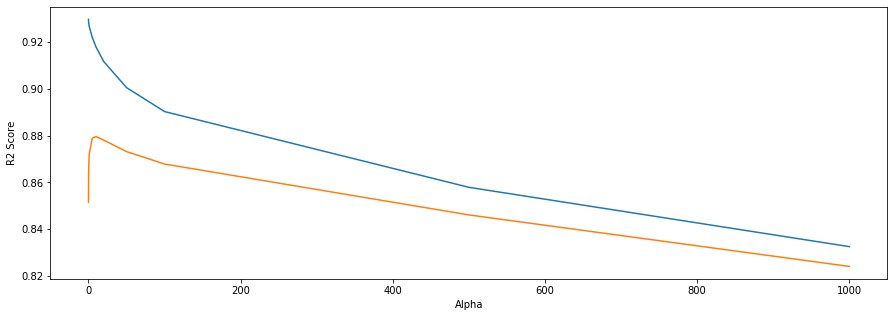

In [276]:
plt.figure(figsize=(15,5))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [277]:
model_cv.best_params_

{'alpha': 10.0}

In [278]:
ridge = Ridge(alpha = 10.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print('Training R2 score: ',r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print('Test R2 score: ',r2_score(y_test,y_pred_test))

model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']

print(ridge_coef[ridge_coef.iloc[:,1]!= 0.00].sort_values(by='Coef',ascending=False).count())
print("\n")
#The top 10 predictor variables
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Training R2 score:  0.9166330407411091
Test R2 score:  0.8795335489034644
Feature    199
Coef       199
dtype: int64




,Feature,Coef
56,Neighborhood_Crawfor,0.248091
57,Neighborhood_Edwards,0.247795
63,Neighborhood_NPkVill,0.235436
131,ExterQual_Fa,0.195052
48,LotConfig_Inside,0.170972
2,LotArea,0.164672
0,MSSubClass,0.160664
194,FireplaceQu_TA,0.149713
90,HouseStyle_2.5Unf,0.149425
14,LowQualFinSF,0.147005


In [279]:
ridge.coef_

array([ 0.07701785,  0.16467236,  0.08797953,  0.10883858,  0.0207047 ,
        0.04125846,  0.10296094,  0.0128002 ,  0.00078357,  0.11308493,
        0.04625379,  0.13617749, -0.00224291,  0.14700529,  0.02071712,
        0.02812766, -0.03116712, -0.05324721,  0.07113529,  0.07215443,
        0.096302  ,  0.03089829,  0.02190874,  0.01935465,  0.04010828,
       -0.02467441,  0.08527512,  0.00378559,  0.02169181, -0.01046681,
       -0.02191782, -0.05977059,  0.03165994,  0.00902433,  0.13365071,
       -0.07134511,  0.13230599,  0.09842034, -0.07369315, -0.01953545,
       -0.02374556,  0.11238406, -0.04853838,  0.        , -0.00537994,
       -0.06392354, -0.06108791,  0.1709722 , -0.19681563, -0.09696522,
        0.06128154, -0.15262497, -0.09210881,  0.03314795, -0.07471814,
        0.24809064,  0.24779537, -0.08809729, -0.04869798, -0.02580068,
       -0.01536362,  0.05889233,  0.235436  , -0.09195507,  0.01999659,
        0.04273534,  0.12947955, -0.21165261, -0.06159944,  0.03

# Optimal value for alpha:

Ridge Regression:- 10.0
    
Lasso Regression:- 0.001

In [280]:
# Doubling the value of alpha for Ridge Regression

print(" ********************* Ridge: Alpha = 20.0 ********************* ")

ridge = Ridge(alpha = 20.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print('Training R2-score: ',r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print('Test R2-score: ', r2_score(y_test,y_pred_test))
print("\n")

model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']
print(ridge_coef[ridge_coef.iloc[:,1]!= 0.00].sort_values(by='Coef',ascending=False).count())
print("\n")
print(ridge_coef.sort_values(by='Coef',ascending=False).head(10))

print("\n")
print("***************************************************************************************")
print("***************************************************************************************")
print("\n\n")


print(" ********************* Ridge: Alpha = 40.0 ********************* ")

ridge = Ridge(alpha = 40.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print('Training R2-score: ',r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print('Test R2-score: ', r2_score(y_test,y_pred_test))
print("\n")

model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']
print(ridge_coef[ridge_coef.iloc[:,1]!= 0.00].sort_values(by='Coef',ascending=False).count())
print("\n")
print(ridge_coef.sort_values(by='Coef',ascending=False).head(10))

print("\n")
print("***************************************************************************************")
print("***************************************************************************************")
print("\n\n")



print(" ********************* Ridge: Alpha = 80.0 ********************* ")
ridge = Ridge(alpha = 80.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print('Training R2-score: ',r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print('Test R2-score: ', r2_score(y_test,y_pred_test))
print("\n")

model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']
print(ridge_coef[ridge_coef.iloc[:,1]!= 0.00].sort_values(by='Coef',ascending=False).count())
print("\n")
print(ridge_coef.sort_values(by='Coef',ascending=False).head(10))

print("\n")
print("***************************************************************************************")
print("***************************************************************************************")
print("\n\n")



print(" ********************* Ridge: Alpha = 100.0 ********************* ")
ridge = Ridge(alpha = 100.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print('Training R2-score: ',r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print('Test R2-score: ', r2_score(y_test,y_pred_test))
print("\n")

model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']
print(ridge_coef[ridge_coef.iloc[:,1]!= 0.00].sort_values(by='Coef',ascending=False).count())
print("\n")
print(ridge_coef.sort_values(by='Coef',ascending=False).head(10))

print("\n")
print("***************************************************************************************")
print("***************************************************************************************")
print("\n\n")


print(" ********************* Ridge: Alpha = 200.0 ********************* ")

ridge = Ridge(alpha = 200.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print('Training R2-score: ',r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print('Test R2-score: ', r2_score(y_test,y_pred_test))
print("\n")

model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']
print(ridge_coef[ridge_coef.iloc[:,1]!= 0.00].sort_values(by='Coef',ascending=False).count())
print("\n")
print(ridge_coef.sort_values(by='Coef',ascending=False).head(10))

print("\n")
print("***************************************************************************************")
print("***************************************************************************************")
print("\n\n")


print(" ********************* Ridge: Alpha = 400.0 ********************* ")

ridge = Ridge(alpha = 400.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print('Training R2-score: ',r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print('Test R2-score: ', r2_score(y_test,y_pred_test))
print("\n")

model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']
print(ridge_coef[ridge_coef.iloc[:,1]!= 0.00].sort_values(by='Coef',ascending=False).count())
print("\n")
print(ridge_coef.sort_values(by='Coef',ascending=False).head(10))

print("\n")
print("***************************************************************************************")
print("***************************************************************************************")
print("\n\n")


print(" ********************* Ridge: Alpha = 800.0 ********************* ")

ridge = Ridge(alpha = 800.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print('Training R2-score: ',r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print('Test R2-score: ', r2_score(y_test,y_pred_test))
print("\n")

model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']
print(ridge_coef[ridge_coef.iloc[:,1]!= 0.00].sort_values(by='Coef',ascending=False).count())
print("\n")
print(ridge_coef.sort_values(by='Coef',ascending=False).head(10))

print("\n")
print("***************************************************************************************")
print("***************************************************************************************")
print("\n\n")



print(" ********************* Ridge: Alpha = 1600.0 ********************* ")

ridge = Ridge(alpha = 1600.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print('Training R2-score: ',r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print('Test R2-score: ', r2_score(y_test,y_pred_test))
print("\n")

model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']
print(ridge_coef[ridge_coef.iloc[:,1]!= 0.00].sort_values(by='Coef',ascending=False).count())
print("\n")
print(ridge_coef.sort_values(by='Coef',ascending=False).head(10))

print("\n")
print("***************************************************************************************")
print("***************************************************************************************")
print("\n\n")

 ********************* Ridge: Alpha = 20.0 ********************* 
Training R2-score:  0.9109526819956562
Test R2-score:  0.8807040432705657


Feature    199
Coef       199
dtype: int64


                  Feature      Coef
57   Neighborhood_Edwards  0.203997
56   Neighborhood_Crawfor  0.183644
2                 LotArea  0.174192
131          ExterQual_Fa  0.165572
63   Neighborhood_NPkVill  0.158753
14           LowQualFinSF  0.142628
48       LotConfig_Inside  0.140766
12               1stFlrSF  0.125960
0              MSSubClass  0.123998
90      HouseStyle_2.5Unf  0.123479


***************************************************************************************
***************************************************************************************



 ********************* Ridge: Alpha = 40.0 ********************* 
Training R2-score:  0.9032260221180566
Test R2-score:  0.8789854376023847


Feature    199
Coef       199
dtype: int64


                  Feature      Coef
2            

In [281]:
# Doubling the value of alpha for Lasso Regression

print(" ********************* Lasso: Alpha = 0.002 ********************* ")
lasso = Lasso(alpha=0.002)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('Training R2-score: ',r2_score(y_true=y_train,y_pred=y_train_pred))
print('Test R2-score: ',r2_score(y_true=y_test,y_pred=y_test_pred))
print("\n")

model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']
print(lasso_coef[lasso_coef.iloc[:,1]!= 0.00].sort_values(by='Coef',ascending=False).count())
print("\n")
print(lasso_coef.sort_values(by='Coef',ascending=False).head(10))

print("\n")
print("***************************************************************************************")
print("***************************************************************************************")
print("\n\n")


print(" ********************* Lasso: Alpha = 0.004 ********************* ")
lasso = Lasso(alpha=0.004)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('Training R2-score: ',r2_score(y_true=y_train,y_pred=y_train_pred))
print('Test R2-score: ',r2_score(y_true=y_test,y_pred=y_test_pred))
print("\n")

model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']
print(lasso_coef[lasso_coef.iloc[:,1]!= 0.00].sort_values(by='Coef',ascending=False).count())
print("\n")
print(lasso_coef.sort_values(by='Coef',ascending=False).head(10))

print("\n")
print("***************************************************************************************")
print("***************************************************************************************")
print("\n\n")

print(" ********************* Lasso: Alpha = 0.008 ********************* ")
lasso = Lasso(alpha=0.008)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('Training R2-score: ',r2_score(y_true=y_train,y_pred=y_train_pred))
print('Test R2-score: ',r2_score(y_true=y_test,y_pred=y_test_pred))
print("\n")
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']
print(lasso_coef[lasso_coef.iloc[:,1]!= 0.00].sort_values(by='Coef',ascending=False).count())
print("\n")
print(lasso_coef.sort_values(by='Coef',ascending=False).head(10))

print("\n")
print("***************************************************************************************")
print("***************************************************************************************")
print("\n\n")


print(" ********************* Lasso: Alpha = 0.016 ********************* ")
lasso = Lasso(alpha=0.016)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('Training R2-score: ',r2_score(y_true=y_train,y_pred=y_train_pred))
print('Test R2-score: ',r2_score(y_true=y_test,y_pred=y_test_pred))
print("\n")

model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']
print(lasso_coef[lasso_coef.iloc[:,1]!= 0.00].sort_values(by='Coef',ascending=False).count())
print("\n")
print(lasso_coef.sort_values(by='Coef',ascending=False).head(10))

print("\n")
print("***************************************************************************************")
print("***************************************************************************************")
print("\n\n")

print(" ********************* Lasso: Alpha = 0.032 ********************* ")
lasso = Lasso(alpha=0.032)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('Training R2-score: ',r2_score(y_true=y_train,y_pred=y_train_pred))
print('Test R2-score: ',r2_score(y_true=y_test,y_pred=y_test_pred))
print("\n")

model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']
print(lasso_coef[lasso_coef.iloc[:,1]!= 0.00].sort_values(by='Coef',ascending=False).count())
print("\n")
print(lasso_coef.sort_values(by='Coef',ascending=False).head(10))

print("\n")
print("***************************************************************************************")
print("***************************************************************************************")
print("\n\n")

print(" ********************* Lasso: Alpha = 0.064 ********************* ")
lasso = Lasso(alpha=0.064)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('Training R2-score: ',r2_score(y_true=y_train,y_pred=y_train_pred))
print('Test R2-score: ',r2_score(y_true=y_test,y_pred=y_test_pred))
print("\n")

model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']
print(lasso_coef[lasso_coef.iloc[:,1]!= 0.00].sort_values(by='Coef',ascending=False).count())
print("\n")
print(lasso_coef.sort_values(by='Coef',ascending=False).head(10))

print("\n")
print("***************************************************************************************")
print("***************************************************************************************")
print("\n\n")

print(" ********************* Lasso: Alpha = 0.128 ********************* ")
lasso = Lasso(alpha=0.128)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('Training R2-score: ',r2_score(y_true=y_train,y_pred=y_train_pred))
print('Test R2-score: ',r2_score(y_true=y_test,y_pred=y_test_pred))
print("\n")

model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']
print(lasso_coef[lasso_coef.iloc[:,1]!= 0.00].sort_values(by='Coef',ascending=False).count())
print("\n")
print(lasso_coef.sort_values(by='Coef',ascending=False).head(10))

print("\n")
print("***************************************************************************************")
print("***************************************************************************************")
print("\n\n")

print(" ********************* Lasso: Alpha = 0.256 ********************* ")
lasso = Lasso(alpha=0.256)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('Training R2-score: ',r2_score(y_true=y_train,y_pred=y_train_pred))
print('Test R2-score: ',r2_score(y_true=y_test,y_pred=y_test_pred))
print("\n")

model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']
print(lasso_coef[lasso_coef.iloc[:,1]!= 0.00].sort_values(by='Coef',ascending=False).count())
print("\n")
print(lasso_coef.sort_values(by='Coef',ascending=False).head(10))

print("\n")
print("***************************************************************************************")
print("***************************************************************************************")
print("\n\n")

 ********************* Lasso: Alpha = 0.002 ********************* 
Training R2-score:  0.9093660750809464
Test R2-score:  0.8821544650716434


Feature    79
Coef       79
dtype: int64


                  Feature      Coef
57   Neighborhood_Edwards  0.334863
56   Neighborhood_Crawfor  0.328562
63   Neighborhood_NPkVill  0.291392
14           LowQualFinSF  0.250486
194        FireplaceQu_TA  0.209946
90      HouseStyle_2.5Unf  0.208675
48       LotConfig_Inside  0.207773
131          ExterQual_Fa  0.198099
2                 LotArea  0.169586
162      BsmtFinType2_GLQ  0.141798


***************************************************************************************
***************************************************************************************



 ********************* Lasso: Alpha = 0.004 ********************* 
Training R2-score:  0.8972198113724275
Test R2-score:  0.8772935229204664


Feature    62
Coef       62
dtype: int64


                  Feature      Coef
57   Neighborho